In [1]:
## ライブラリのインポート ##
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:

## テキストデータをnumpy形式に変換する(解析のための下準備) ##
###  必ず使用する  ###
def Text2Numpy(**args):
    """
    大学にある重心動揺計の計測データ（csv）を取り込み，pythonで処理しやすいように変換するための関数
    filename:処理したいファイル名
    """    
    ## データを開く ##
    with open(args["filename"],"r",encoding="shift-jis") as dat:
        datacop= dat.read()

    ## 書き出し先を作る ##
    COPdata = {"ID":None,"sex":None,"age":None,"height":None,"weight":None,"cop":[]}
    attribute = {"ID":0,"sex":2,"age":3,"height":4,"weight":5}
    ## 処理1 ##
    ### データの整理 ###
    d0 = datacop.split("\n") # スプリット
    COPdata["ID"] = d0[attribute["ID"]].split(",")[1][1:-1]# IDの取り出し
    COPdata["sex"] = d0[attribute["sex"]].split(",")[1][1:-1]# 性別の取り出し
    COPdata["age"] = (d0[attribute["age"]].split(",")[1][1:-1])# 年齢の取り出し
    COPdata["height"] = (d0[attribute["height"]].split(",")[1][1:-1])# 身長の取り出し
    COPdata["weight"] = (d0[attribute["weight"]].split(",")[1][1:-1])# 体重の取り出し

    for i in d0[7:]:
        if len(i)==0:
            break
            
        nn = i.split(",")
        if args["Weightshow"]==True:
            ww = nn[0:3]+[nn[5]]
        else:
            ww = nn[0:3]
            
        COPdata["cop"].append(list(map(float,ww)))

    COPdata["cop"] = np.array(COPdata["cop"])
    
    ## 処理1完了 ##
    return COPdata

In [12]:
A = Text2Numpy(filename="/Users/tumh/Desktop/0509COP/181P003_1.csv",Weightshow=True)

In [13]:
A["sex"]

'男'

In [16]:
B = A["cop"].copy()

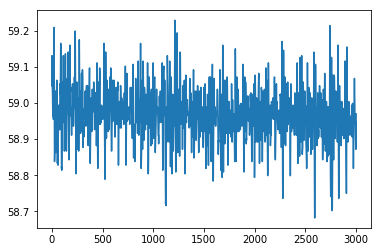

In [17]:
plt.plot(B[:,3])

In [18]:
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real

In [45]:
ww = int(len(B)*8/(1/0.01))  



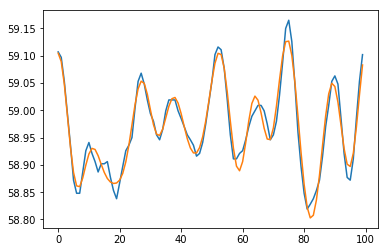

In [47]:
plt.plot(B[500:(2048+500),3][300:400])
plt.plot(FFT(B[500:(2048+500),3],ww,False)[300:400])

In [19]:
len(B)

3001

In [49]:
import pandas as pd

ディレクトリ構造

データの読み込み

Markdownによるレポート作成